<a href="https://colab.research.google.com/github/jin237/algorithm_python/blob/main/2110008_midterm_report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# k-means法で，手書きの数字の画像の分類を行う．
### 使用モジュール
- sklearn
- numpy
- OpenCV
- matplotlib
- scipy


In [13]:
# load dataset, scikit-learn
# utility function called load_digits in scikit-learn
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)

(1797, 64)


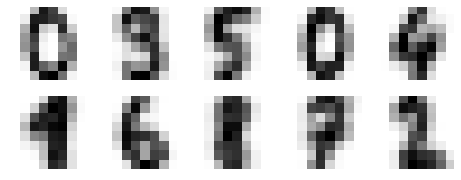

In [30]:
# k-means
import cv2
import numpy as np
import matplotlib.pyplot as plt

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10 ,1.0)
flags = cv2.KMEANS_RANDOM_CENTERS
digits.data = digits.data.astype(np.float32)
compactness, clusters, centers = cv2.kmeans(digits.data, 10, None, criteria, 10, flags)


plt.style.use('ggplot')
%matplotlib inline
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = centers.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [31]:
from scipy.stats import mode
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


labels = np.zeros_like(clusters.ravel())
for i in range(10):
    mask = (clusters.ravel() == i)
    labels[mask] = mode(digits.target[mask])[0]

print('混同行列 - 分類結果')
print(confusion_matrix(digits.target, labels))
print('正解率', accuracy_score(digits.target, labels))

混同行列 - 分類結果
[[177   0   0   0   1   0   0   0   0   0]
 [  0  55  25   0   0   1   2   0  99   0]
 [  1   2 151  12   0   0   0   3   8   0]
 [  0   0   2 164   0   1   0   8   8   0]
 [  0   4   0   0 164   0   0  11   2   0]
 [  0   0   0  40   2 135   5   0   0   0]
 [  1   0   0   0   0   0 176   0   4   0]
 [  0   2   0   0   0   5   0 170   2   0]
 [  0  10   4  43   0   8   6   3 100   0]
 [  0  20   0 145   0   7   0   8   0   0]]
正解率 0.7189760712298275


0.7639955481357819

上記のコードの試行回数：__10__

- No.1：0.7846410684474123
- No.2：0.7790762381747357
- No.3：0.7762938230383973
- No.4：0.7851975514746801
- No.5：0.7835281023928771
- No.6：0.7267668336115748
- No.7：0.7835281023928771
- No.8：0.7740678909293267
- No.9：0.7278797996661102
- No.10：0.7189760712298275

平均：0.7639955481357819=>__76.9%__<br><br>
全体的な混同配列から，’９’が’３’として認識されやすいことがわかる．そのことから，全体的な正解率の減少が見られる．また，’８’や’１’は左右対称の形状であることから，誤分類のデータ量が多い．しかし，0は丸として判断されやすいと予測でき，正解率は高い．